In [21]:
import numpy as np 
import pandas as pd 

<AxesSubplot:xlabel='Vol'>

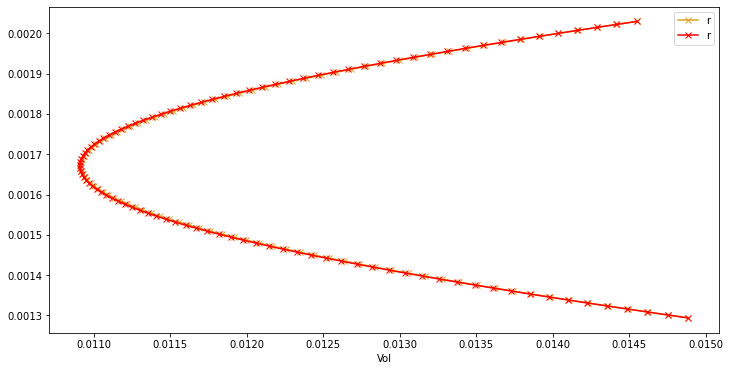

In [54]:
dados = pd.read_csv("dados_ajustados.csv", decimal= ",", delimiter =";")
dados = dados[["SPXI", "IBOV"]]
retornos = dados.pct_change().dropna()
cov = np.array(retornos.cov())
e_r = np.array(retornos.mean()).reshape(2, 1)


returns = np.linspace(min(e_r), max(e_r), 100)
carteiras_pi = np.array([np.round(optimal_weights(r, e_r, cov), 2) for r in returns])
carteiras_scipy = np.array([minimize_vol(r, e_r, cov).reshape((2, 1)) for r in returns])

vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_pi]
dic1 = {"Vol": vol1, "r": returns.reshape(returns.shape[0])}
df1 = pd.DataFrame(dic1)
ax = df1.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
df2 = pd.DataFrame(dic2)
df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)

In [52]:
optimal_weights(e_r[0,0], e_r, cov)

array([[9.99978414e-01],
       [2.15856237e-05]])

In [7]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    """
    target_ret -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - weights.T@er
    }
    
    results = minimize(lambda weights, cov: weights.T@cov@weights, init_guess,
                       args=(cov,), method="SLSQP",
                       options={"disp":False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x
    

In [51]:
def optimal_weights(rp, er, cov):
    n = er.shape[0]
    w = np.ones((n,1))*1/n

    gradc = np.hstack((np.ones((n,1)), er))
    
    
    
    l = np.array([[0.],[0.]])
    A = generate_A(Sigma, gradc)
    
    for i in range(1000):
        b = generate_b(Sigma, gradc, er, l, w, rp)
        dx = np.linalg.inv(A)@b
        dw, dl = np.vsplit(dx, 2)
        w = w + 0.01*dw
        l = l + 0.01*dl
        
    return w
    
    

In [9]:
Sigma = np.array([[1, 1/2],[1/2, 1]])
er = np.array([[0.1], [0.2]])

returns = np.linspace(min(er), max(er), 100)
carteiras_pi = np.array([np.round(optimal_weights(r, er, Sigma), 2) for r in returns])
carteiras_scipy = np.array([minimize_vol(r, er, Sigma).reshape((2, 1)) for r in returns])

#for array in (carteiras_pi-carteiras_scipy):
#   print(round(np.linalg.norm(array),3)*100, "%")


In [3]:
Sigma = np.array([[1, 1/2],[1/2, 1]])
er = np.array([[0.1], [0.2]])

w = np.array([[0.5],[0.5]])
gradc = np.array([[1, 0.1],[1, 0.2]])
l = np.array([[0.],[0.]])
er = np.array([[0.1], [0.2]])
rp =0.12

#Initial Guess
w = np.array([[0.5],[0.5]]) 
l = np.array([[0.],[0.]])

def generate_b(Sigma, gradc, er, l, w, rp):
    a = 2*Sigma@w + gradc@l
    b = np.ones((1,2))@w - 1
    c = er.T@w - rp
    return -1*np.vstack((a, b, c))

def generate_A(Sigma,gradc):
    a = np.hstack([2*Sigma, gradc])
    b = np.hstack([gradc.T, np.zeros((2,2))])
    return np.vstack((a, b))

for i in range(1000):
    A = generate_A(Sigma, gradc)
    b = generate_b(Sigma, gradc, er, l, w, rp)
    
    dx = np.linalg.inv(A)@b
    dw, dl = np.vsplit(dx, 2)
    w = w + 0.01*dw
    l = l + 0.01*dl

array([[0.79998705],
       [0.20001295]])

In [10]:
vol1 = [float(np.sqrt(w.T@Sigma@w)) for w in carteiras_pi]
dic1 = {"Vol": vol, "r": returns.reshape(returns.shape[0])}
df1 = pd.DataFrame(dic1)
ax = df.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

vol2 = [float(np.sqrt(w.T@Sigma@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
df2 = pd.DataFrame(dic2)
df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)



NameError: name 'vol' is not defined